In [194]:
import requests
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from sklearn.cluster import KMeans, DBSCAN
import h5pyd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import cKDTree
from sklearn import preprocessing
pio.renderers.default = 'iframe'
%matplotlib inline

In [5]:
#api_key='SZ95JWD0CuJgihkCYAlQpdOf9yWXPNBLk9XajTI8'
api_key='7FO5a8h09cUIaxYyp8XtzCIeEpKexnLrw7d7p83Y'
uri_data=f'https://developer.nrel.gov/api/solar/solar_resource/v1.json?api_key={api_key}&lat=40&lon=-105&radius=50&all=1'
uri_locations=f'https://developer.nrel.gov/api/solar/data_query/v1.json?api_key={api_key}&lat=40&lon=-105&radius=1000&all=1'

In [260]:
def get_stations(lat=40,lon=-105,radius=1000):
    uri_stations=f'https://developer.nrel.gov/api/solar/data_query/v1.json?api_key={api_key}&lat={lat}&lon={lon}&radius={radius}&all=1'
    rstations = requests.get(uri_stations)
    print(rstations)
    stations = rstations.json()['outputs']['all_stations']
    return stations
   
def get_data(lat=40,lon=-105,radius=0):
    uri_data=f'https://developer.nrel.gov/api/solar/solar_resource/v1.json?api_key={api_key}&lat={lat}&lon={lon}&radius={radius}&all=1'
    rdata = requests.get(uri_data)
    data = rdata.json()['outputs']
    return data

def get_energy(lat=40,lon=-105,radius=0,capacity=4,azimuth=180,tilt=0,array_type=0,module_type=0,losses=10):
    uri_energy=f'https://developer.nrel.gov/api/pvwatts/v6.json?api_key={api_key}&lat={lat}&lon={lon}&radius={radius}'
    uri_energy+=f'&system_capacity={capacity}&azimuth={azimuth}&tilt={tilt}&array_type={array_type}&module_type={module_type}&losses={losses}'
    print(lat,lon)
    renergy = requests.get(uri_energy)
    data = renergy.json()['outputs']
    return data
                         
def build_ds(lat=40,lon=-105,radius=1000):
    ds = pd.DataFrame()
    stations = get_stations(lat=lat,lon=lon,radius=radius)
    for e in stations:
        if e['dataset'] == 'tmy3':
            try:
                data = get_data(e['lat'],e['lon'])
                entry = {'lat':e['lat'],
                     'lon':e['lon'],
                     'elevation':e['elevation'],
                     'avg_dni_annual':data['avg_dni']['annual'],
                     'avg_ghi_annual':data['avg_ghi']['annual'],
                     'avg_lat_tilt_annual':data['avg_lat_tilt']['annual']}
                for m,v in data['avg_dni']['monthly'].items():
                    entry[f'avg_dni_{m}'] = v
                for m,v in data['avg_ghi']['monthly'].items():
                    entry[f'avg_ghi_{m}'] = v
                for m,v in data['avg_lat_tilt']['monthly'].items():
                    entry[f'avg_lat_tilt_{m}'] = v                        
                ds = ds.append(entry, ignore_index=True)
            except:
                pass
    return ds

def get_rad_data(timestep,spatial_index):
    df['ghi'] = f['ghi'][timestep][spatial_index]/f['ghi'].attrs['psm_scale_factor']
    df['dni'] = f['dni'][timestep][spatial_index]/f['dni'].attrs['psm_scale_factor']
    df['dhi'] = f['dhi'][timestep][spatial_index]/f['dhi'].attrs['psm_scale_factor']
    df['dew_point'] = f['dew_point'][timestep][spatial_index]/f['dew_point'].attrs['psm_scale_factor']
    df['solar_zenith_angle'] = f['solar_zenith_angle'][timestep][spatial_index]/f['solar_zenith_angle'].attrs['psm_scale_factor']
    df['total_precip'] = f['total_precipitable_water'][timestep][spatial_index]/f['total_precipitable_water'].attrs['psm_scale_factor']
    df['air_temp'] = f['air_temperature'][timestep][spatial_index]/f['air_temperature'].attrs['psm_scale_factor']
    df['wind_speed'] = f['wind_speed'][timestep][spatial_index]/f['wind_speed'].attrs['psm_scale_factor']
    df['relative_humidity'] = f['relative_humidity'][timestep][spatial_index]/f['relative_humidity'].attrs['psm_scale_factor']
    df['surface_albedo'] = f['surface_albedo'][timestep][spatial_index]/f['surface_albedo'].attrs['psm_scale_factor']
    df['cloud_type'] = f['cloud_type'][timestep][spatial_index]/f['cloud_type'].attrs['psm_scale_factor']
    df['clearsky_dhi'] = f['clearsky_dhi'][timestep][spatial_index]/f['clearsky_dhi'].attrs['psm_scale_factor']
    df['clearsky_dni'] = f['clearsky_dni'][timestep][spatial_index]/f['clearsky_dni'].attrs['psm_scale_factor']
    df['clearsky_ghi'] = f['clearsky_ghi'][timestep][spatial_index]/f['clearsky_ghi'].attrs['psm_scale_factor']
    return df

def get_mean_rad_data(stride,spatial_index):
    df['ghi'] = np.mean(f['ghi'][::stride][spatial_index]/f['ghi'].attrs['psm_scale_factor'],axis=0)
    df['dni'] = np.mean(f['dni'][::stride][spatial_index]/f['dni'].attrs['psm_scale_factor'],axis=0)
    df['dhi'] = np.mean(f['dhi'][::stride][spatial_index]/f['dhi'].attrs['psm_scale_factor'],axis=0)
    df['dew_point'] = np.mean(f['dew_point'][::stride][spatial_index]/f['dew_point'].attrs['psm_scale_factor'],axis=0)
    df['solar_zenith_angle'] = np.mean(f['solar_zenith_angle'][::stride][spatial_index]/f['solar_zenith_angle'].attrs['psm_scale_factor'],axis=0)
    df['total_precip'] = np.mean(f['total_precipitable_water'][::stride][spatial_index]/f['total_precipitable_water'].attrs['psm_scale_factor'],axis=0)
    df['air_temp'] = np.mean(f['air_temperature'][::stride][spatial_index]/f['air_temperature'].attrs['psm_scale_factor'],axis=0)
    df['wind_speed'] = np.mean(f['wind_speed'][::stride][spatial_index]/f['wind_speed'].attrs['psm_scale_factor'],axis=0)
    df['relative_humidity'] = np.mean(f['relative_humidity'][::stride][spatial_index]/f['relative_humidity'].attrs['psm_scale_factor'],axis=0)
    df['surface_albedo'] = np.mean(f['surface_albedo'][::stride][spatial_index]/f['surface_albedo'].attrs['psm_scale_factor'],axis=0)
    df['cloud_type'] = np.mean(f['cloud_type'][::stride][spatial_index]/f['cloud_type'].attrs['psm_scale_factor'],axis=0)
    df['clearsky_dhi'] = np.mean(f['clearsky_dhi'][::stride][spatial_index]/f['clearsky_dhi'].attrs['psm_scale_factor'],axis=0)
    df['clearsky_dni'] = np.mean(f['clearsky_dni'][::stride][spatial_index]/f['clearsky_dni'].attrs['psm_scale_factor'],axis=0)
    df['clearsky_ghi'] = np.mean(f['clearsky_ghi'][::stride][spatial_index]/f['clearsky_ghi'].attrs['psm_scale_factor'],axis=0)
    return df

def get_energy_data(timestep,coordinates):
    ac_array = []
    for i in range(coordinates.shape[0]):
        lat = coordinates.values[i][1]
        lon = coordinates.values[i][0]
        #try:
        ac = get_energy(lat=lat,lon=lon)['ac_monthly'][timestep]
        #except:
        #    ac = 0
        ac_array.append(ac)
    df_energy['ac'] = ac_array    
    return df_energy 

def cluster_data(df,n_clusters=8,eps=0.1):
    features = [c for c in df.columns if c != 'latitude' and 
                c != 'longitude' and c != 'cluster' and 
                c != 'wind_speed' and c != 'clearsky_dhi' and
                c != 'clearsky_dni' and c != 'clearsky_ghi' and
                c != 'elevation' and c != 'landcover']
    x = df[features].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_scaled = pd.DataFrame(x_scaled)
    clusters = KMeans(n_clusters=n_clusters, random_state=0).fit(df_scaled)
    #clusters = DBSCAN(eps=eps).fit(df_scaled)
    df['cluster'] = clusters.labels_
    return df,clusters.inertia_

In [52]:
f = h5pyd.File("/nrel/nsrdb/v3/nsrdb_2018.h5", 'r')

In [250]:
meta = pd.DataFrame(f['meta'][...])
USA = meta.loc[meta['country']==b'United States'][::1000]
times = pd.to_datetime(f['time_index'][...].astype(str))
df = USA[['longitude','latitude','elevation','landcover']].copy()
df_energy = USA[['longitude','latitude']].copy()
'''
CO = meta.loc[meta['state']==b'Colorado'][::10]
df = CO[['longitude','latitude']].copy()
df_energy = CO[['longitude','latitude']].copy()
'''

"\nCO = meta.loc[meta['state']==b'Colorado'][::10]\ndf = CO[['longitude','latitude']].copy()\ndf_energy = CO[['longitude','latitude']].copy()\n"

In [ ]:
df = get_mean_rad_data(1000,USA.index)

In [177]:
df_energy = get_energy_data(0,USA)

In [187]:
#get_energy(lat=18.93,lon=-155.66,azimuth=180,module_type=1,tilt=40,array_type=1,capacity=10)

In [238]:
distortions = []
K = range(1,10)
for k in K:
    df,dist = cluster_data(df,n_clusters=k)
    distortions.append(dist)
    
def curvature(a):
    b = [0]*len(a)
    for i in range(len(b)):
        if 0<i<len(a)-1:
            b[i] = (a[i+1]-2*a[i]+a[i-1])
        elif i==0:
            b[i] = (a[i+1]-2*a[i])
        elif i==len(a)-1:
            b[i] = (-2*a[i]+a[i-1])
    return b        

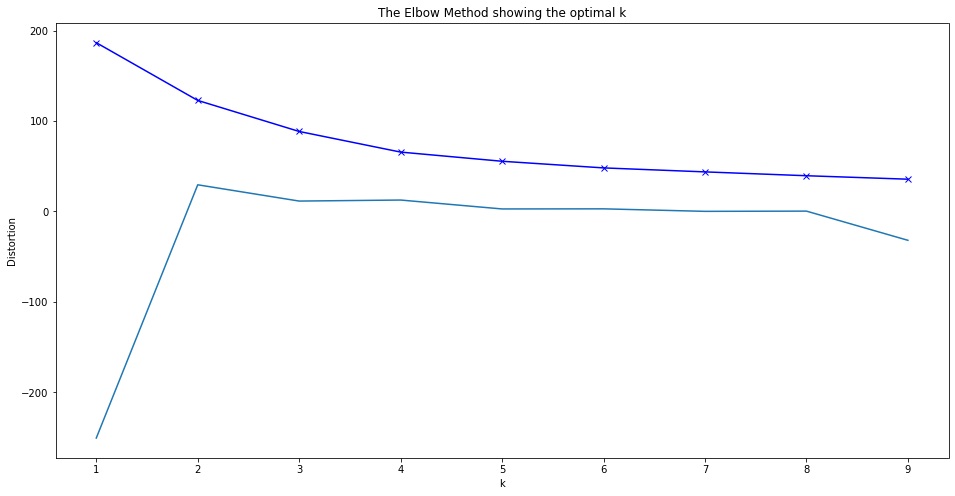

In [239]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.plot(K,curvature(distortions))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [246]:
df,dist = cluster_data(df,n_clusters=2)

In [247]:
fig = make_subplots(
    rows=2, cols=4,
    column_widths=[0.25, 0.25, 0.25, 0.25],
    row_heights=[0.5, 0.5],
    specs=[[{"type":"scattergeo","colspan":2}, None, {"type":"scattergeo","rowspan":1},{"type":"scattergeo","rowspan":1}],
           [{"type":"scattergeo","rowspan":1}, {"type":"scattergeo","rowspan":1}, 
            {"type":"scattergeo","rowspan":1},{"type":"scattergeo","rowspan":1}]],
    subplot_titles=("Clusters","Direct Normal Irradiance","Relative Humidity","Wind Speed","Cloud Type","Air Temperature","Surface Albedo"))

fig.add_trace(go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['cluster'],
        mode = 'markers',
        marker_color = df['cluster'],
        showlegend=False,
        ),row=1,col=1)

fig.add_trace(go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['dni'],
        mode = 'markers',
        marker_color = df['dni'],
        showlegend=False,
        ),row=1,col=3)

fig.add_trace(go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['relative_humidity'],
        mode = 'markers',
        marker_color = df['relative_humidity'],
        showlegend=False,
        ),row=1,col=4)

fig.add_trace(go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['wind_speed'],
        mode = 'markers',
        marker_color = df['wind_speed'],
        showlegend=False,
        ),row=2,col=1)

fig.add_trace(go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['cloud_type'],
        mode = 'markers',
        marker_color = df['cloud_type'],
        showlegend=False,
        ),row=2,col=2)

fig.add_trace(go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['air_temp'],
        mode = 'markers',
        marker_color = df['air_temp'],
        showlegend=False,
        ),row=2,col=3)

fig.add_trace(go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['surface_albedo'],
        mode = 'markers',
        marker_color = df['surface_albedo'],
        showlegend=False,
        ),row=2,col=4)

fig.update_geos(scope='usa')

fig.show()

In [248]:
df.groupby(['cluster']).mean()

,longitude,latitude,elevation,landcover,ghi,dni,dhi,air_temp,wind_speed,relative_humidity,surface_albedo,cloud_type,clearsky_dhi,clearsky_dni,clearsky_ghi
cluster,,,,,,,,,,,,,,,
0,-101.669907,36.519966,730.912048,92.180064,13.845659,53.855305,6.655949,-0.090675,2.333441,57.263794,0.147331,3.540193,5.556270,116.379421,18.726688
1,-100.757629,44.801357,805.451050,83.093220,3.139831,12.008475,2.313559,-15.981780,2.220339,74.066229,0.657627,4.266949,2.673729,43.669492,6.563559


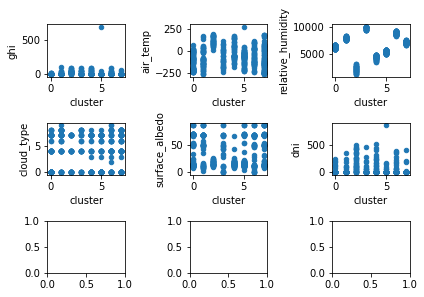

In [169]:
fig, axes = plt.subplots(nrows=3, ncols=3)
df.plot(kind='scatter',x='cluster',y='ghi',ax=axes[0,0])
df.plot(kind='scatter',x='cluster',y='air_temp',ax=axes[0,1])
df.plot(kind='scatter',x='cluster',y='relative_humidity',ax=axes[0,2])
df.plot(kind='scatter',x='cluster',y='cloud_type',ax=axes[1,0])
df.plot(kind='scatter',x='cluster',y='surface_albedo',ax=axes[1,1])
df.plot(kind='scatter',x='cluster',y='dni',ax=axes[1,2])
plt.tight_layout()

<AxesSubplot:xlabel='cluster', ylabel='ghi'>

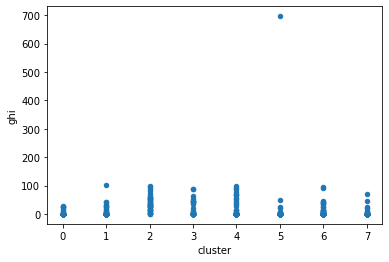

In [162]:
df.plot(kind='scatter',x='cluster',y='ghi')